In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cm

sb.set(style="ticks", color_codes=True, context="paper", font_scale=1.5)
sb.set_style({"xtick.direction": "in","ytick.direction": "in"})

main_path = os.path.dirname(os.getcwd())

import warnings
warnings.filterwarnings('ignore')

save_plots = False
save_tables = False

# Concat all tables after validation! 

In [3]:
org_sample = pd.read_csv('%s/data/inter/OGLE3_x_GaiaDR2_to_validate.csv' % (main_path))
org_sample.set_index('source_id', inplace=True)

In [4]:
need_visual_inspec = [4056280918169680896,
                      4062346816489283584,
                      4048829111177783168,
                      4043166454663883648,
                      4062404785587713280,
                      4064897339785110016]

aladin_conf_ids = [4056280918169680896,
                   4062346816489283584,
                   4048829111177783168,
                   4043166454663883648,
                   4062404785587713280]

drop_from_missmatch = [4062591973279332224,
                       4043137424868086656,
                       4655269632920639744,
                       4056606472325371776,
                       4061277236440709248]

In [5]:
def_confirmed = pd.read_csv('../data/inter/definite_matches.csv')
def_confirmed.set_index('source_id', inplace=True)
print('Definitive xmatches: ', def_confirmed.shape)

one_pmrad_match = pd.read_csv('../data/inter/one_pmrad_match.csv')
one_pmrad_match.set_index('source_id', inplace=True)
#one_pmrad_match.drop(need_visual_inspec, inplace=True, errors='ignore')
print('One PM radius xmatches: ', one_pmrad_match.shape)

aladin_conf = org_sample.loc[aladin_conf_ids]
print('Aladin conf        : ', aladin_conf.shape)

var_confirmed = pd.read_csv('../data/inter/var_conf_matches.csv')
var_confirmed.set_index('source_id', inplace=True)
var_confirmed.drop(drop_from_missmatch, errors='ignore', inplace=True)
print('VarClass match + missmatch : ', var_confirmed.shape)

var_noCls_conf = pd.read_csv('../data/inter/gaiaVar_noClass_confirmed.csv')
var_noCls_conf.set_index('source_id', inplace=True)
print('Gaia Var no Class confirmed: ', var_noCls_conf.shape)

cmd_confirmed = pd.read_csv('../data/inter/cmd_confirmed.csv')
cmd_confirmed.set_index('source_id', inplace=True)
print('CMD confirmed: ', cmd_confirmed.shape)

cmd_second = pd.read_csv('../data/inter/cmd_secondaries_confirmed.csv')
cmd_second.set_index('source_id', inplace=True)
print('CMD second match confirmed: ', cmd_second.shape)

second_match_var_id = [4063935821198119936, 4056360186018662144]

Definitive xmatches:  (19545, 51)
One PM radius xmatches:  (1119, 46)
Aladin conf        :  (5, 51)
VarClass match + missmatch :  (3828, 53)
Gaia Var no Class confirmed:  (463, 46)
CMD confirmed:  (7620, 51)
CMD second match confirmed:  (539, 45)


In [6]:
final_set = pd.concat([def_confirmed, one_pmrad_match, aladin_conf,
                       var_confirmed, var_noCls_conf, cmd_confirmed,
                       cmd_second])

final_set.shape

(33119, 54)

In [7]:
final_set.V = final_set.V_I - final_set.I

In [8]:
cols = ['OGLE-ID', 'Dec', 'Period', 'RA', 'SNR', 'Type', 'subType',
        'V', 'V_I', 'I',
        'ra_x', 'ra_error', 'dec_x', 'dec_error',
        'parallax', 'parallax_error', 
        'pmdec', 'pmdec_error', 'pmra', 'pmra_error',
        'phot_bp_mean_flux', 'phot_bp_mean_flux_error', 'phot_bp_mean_mag', 
        'phot_g_mean_flux', 'phot_g_mean_flux_error', 'phot_g_mean_mag', 
        'phot_rp_mean_flux', 'phot_rp_mean_flux_error', 'phot_rp_mean_mag', 
        'bp_rp', 'a_g_val',
        'radial_velocity', 'radial_velocity_error', 
        'radius_val', 'lum_val', 'e_bp_min_rp_val', 'rv_nb_transits', 'teff_val',
        'r_est', 'r_hi', 'r_lo',
        'abs_Gmag', 'abs_Imag',
        '[Fe/H]_J95', '[Fe/H]_ZW']
final_set.rename(columns={'OGLE-ID': 'OGLE_id'}, inplace=True)
final_set.head()

,Dec,I,OGLE_id,Period,RA,SNR,Type,V,V_I,[Fe/H]_J95,...,r_lo,ra_epoch2000,ra_error,ra_x,radial_velocity,radial_velocity_error,radius_val,rv_nb_transits,subType,teff_val
source_id,,,,,,,,,,,,,,,,,,,,,
4685799325574624384,-73.82242,17.245,OGLE-SMC-CEP-0285,1.104418,9.629958,5.868182,CEP,-16.652002,0.592998,NaN,...,2496.620888,9.629947,0.1190,9.629959,NaN,NaN,NaN,0,F/1O,NaN
5282750542198510848,-68.92447,15.307,OGLE-LMC-ECL-25743,3.810757,91.106125,25.973946,ECL,-15.459000,-0.152000,NaN,...,5816.094159,91.106106,0.0425,91.106125,NaN,NaN,NaN,0,ED,8868.67
4690573301975819904,-71.80314,14.705,OGLE-SMC-CEP-3206,6.839948,15.248167,25.331000,CEP,-13.953000,0.752000,NaN,...,6706.403658,15.248154,0.0339,15.248169,NaN,NaN,NaN,0,F,5375.00
4685857595383666176,-73.68489,15.063,OGLE-SMC-CEP-1888,5.665222,13.110500,39.375640,CEP,-14.315999,0.747001,NaN,...,7076.158735,13.110493,0.0272,13.110501,NaN,NaN,NaN,0,F,5807.50
4687235322114091264,-72.80334,16.012,OGLE-SMC-CEP-4344,1.860366,18.144417,7.549683,CEP,-15.357999,0.654001,NaN,...,5487.146495,18.144401,0.0440,18.144418,NaN,NaN,NaN,0,1O,5861.00


In [9]:
if save_tables:
    final_set.loc[:, cols].to_csv('../data/Validated_OGLExGAIA.csv')

In [10]:
final_set.Type.value_counts()

ECL      9507
RRLYR    9324
CEP      7121
LPV      4349
ELL      2269
T2CEP     436
ACEP       71
DSCT       42
Name: Type, dtype: int64

In [11]:
secured = pd.concat([def_confirmed, one_pmrad_match, var_confirmed])
cmd_sec = pd.concat([cmd_confirmed, cmd_second])

['ACEP', 'CEP', 'DSCT', 'ECL', 'ELL', 'LPV', 'RRLYR', 'T2CEP']


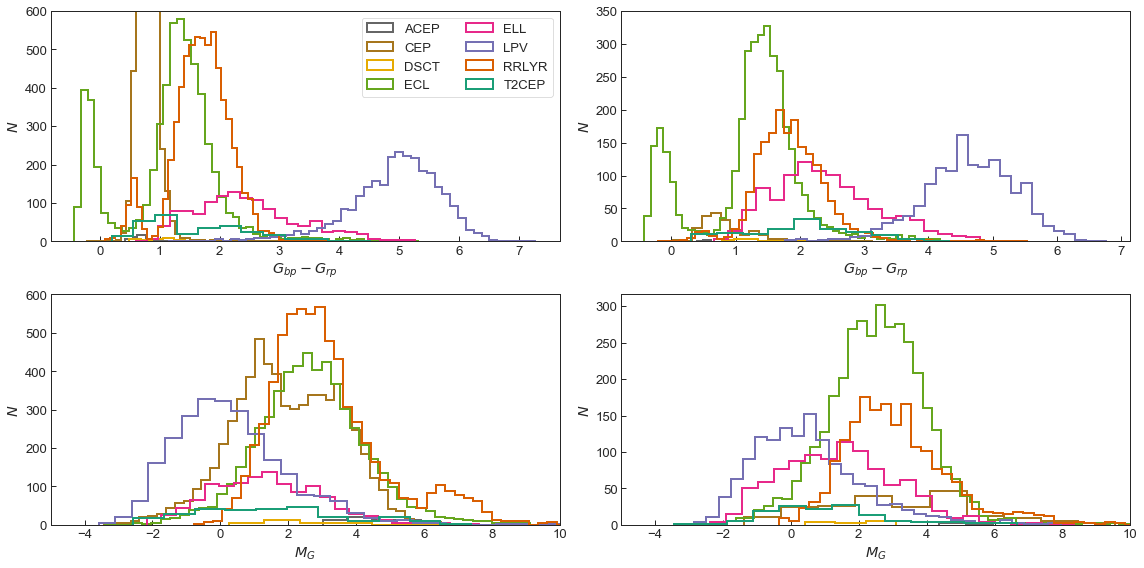

In [12]:
sb.set_palette("Dark2_r", n_colors=8)

fig, ax = plt.subplots(2,2, figsize=(16,8))

labels = sorted(list(set(final_set.Type.values)))
print(labels)
c = cm.Dark2_r(np.linspace(0,1,len(set(labels))))

for i, cls in enumerate(labels):
    #if cls == 'ACEP': continue
    aux = secured.query('Type == "%s"' % cls).dropna(subset=['bp_rp'])
    aux_cmd = cmd_sec.query('Type == "%s"' % cls).dropna(subset=['bp_rp'])
    
    sb.distplot(aux.bp_rp.values, hist=True, hist_kws={'histtype':'step', 'lw':2, 'alpha':1}, kde=False, label=cls, ax=ax[0,0], norm_hist=False)
    sb.distplot(aux_cmd.bp_rp.values, hist=True, hist_kws={'histtype':'step', 'lw':2, 'alpha':1}, kde=False, ax=ax[0,1], norm_hist=False)
    
    aux = secured.query('Type == "%s"' % cls).dropna(subset=['abs_Gmag'])
    aux_cmd = cmd_sec.query('Type == "%s"' % cls).dropna(subset=['abs_Gmag'])
    
    sb.distplot(aux.abs_Gmag.values, hist=True, hist_kws={'histtype':'step', 'lw':2, 'alpha':1}, kde=False, label=cls, ax=ax[1,0], norm_hist=False)
    sb.distplot(aux_cmd.abs_Gmag.values, hist=True, hist_kws={'histtype':'step', 'lw':2, 'alpha':1}, kde=False, ax=ax[1,1], norm_hist=False)

ax[0,0].legend(ncol=2)
#ax[0,0].set_xscale('log')
#ax[0,1].set_yscale('log')

#ax[0,0].set_xlim(-5,10)
ax[0,0].set_ylim(0,600)
#ax[0,1].set_xlim(-5,10)
ax[0,1].set_ylim(0,350)

ax[1,0].set_xlim(-5,10)
ax[1,0].set_ylim(0,600)
ax[1,1].set_xlim(-5,10)
#ax[1,1].set_ylim(0,600)

ax[0,0].set_xlabel('$G_{bp}-G_{rp}$')
ax[0,0].set_ylabel('$N$')
ax[0,1].set_xlabel('$G_{bp}-G_{rp}$')
ax[0,1].set_ylabel('$N$')

ax[1,0].set_xlabel('$M_G$')
ax[1,0].set_ylabel('$N$')
ax[1,1].set_xlabel('$M_G$')
ax[1,1].set_ylabel('$N$')

plt.tight_layout()

if save_plots:
    plt.savefig('../paper_figures/lum_color_dist.pdf', 
                format='pdf', bbox_inches='tight')
plt.show()
                       

# Joint Distributions

In [13]:
phys2 = ['abs_Gmag', 'teff_val', 'Period']
meta_plot = final_set.dropna(subset=phys2)

meta_plot.loc[:,'log_Period'] = np.log10(meta_plot.Period)
meta_plot.loc[:,'log_teff_val'] = np.log10(meta_plot.teff_val)

In [14]:
sb.__version__

'0.10.1'

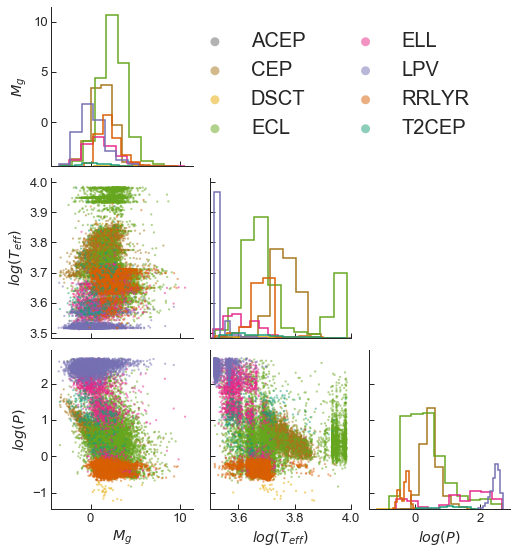

In [15]:
g = sb.PairGrid(meta_plot.query('Period <= 500'), 
                vars=['abs_Gmag', 'log_teff_val', 'log_Period'],
                hue='Type', 
                hue_order=labels,
                corner=False, despine=True, palette='Dark2_r')
g = g.map_diag(plt.hist, histtype='step', lw=1.5)
g = g.map_offdiag(plt.scatter, marker='.', s=20, alpha=.5, edgecolors='none')
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)
g = g.add_legend(loc='upper center', fontsize=20, title='', 
                 markerscale=4, ncol=2, 
                 bbox_to_anchor=(.4,1))    
for ax in g.axes.flat:
    # This only works for the left ylabels
    ax.set_ylabel(ax.get_ylabel(), fontsize='x-large')
    ax.set_xlabel(ax.get_xlabel(), fontsize='x-large')
    
g.axes[2,1].set_xlim(3.5,4)
g.axes[0,0].set_ylabel(r'$M_{g}$')
g.axes[1,0].set_ylabel(r'$log(T_{eff})$')
g.axes[2,0].set_ylabel(r'$log(P)$')
g.axes[2,0].set_xlabel(r'$M_{g}$')
g.axes[2,1].set_xlabel(r'$log(T_{eff})$')
g.axes[2,2].set_xlabel(r'$log(P)$')

if save_plots:
    plt.savefig('../paper_figures/phys_params_joint.pdf',
                format='pdf', bbox_inches='tight')

plt.show()